# Deep Network Transfer

This notebook uses neural network trained on other datasets to predict seabirds' dives from new trajectories.

Networks:

* UNet trained on SV_5s
* FCNet trained on SV_5s

Test Dataset:

* SV from Guanape


## connect to drive

In [1]:
# mount google drive
from google.colab import drive
drive.mount("/content/drive/")

%cd drive/My\ Drive/THESIS/BirdDL

Mounted at /content/drive/
/content/drive/My Drive/THESIS/BirdDL


## data & libraries

In [2]:
!pip install pytorch-lightning

     |████████████████████████████████| 1.0 MB 15.3 MB/s 
     |████████████████████████████████| 596 kB 68.2 MB/s 
     |████████████████████████████████| 329 kB 63.6 MB/s 
     |████████████████████████████████| 125 kB 75.1 MB/s 
     |████████████████████████████████| 829 kB 58.1 MB/s 
     |████████████████████████████████| 1.1 MB 56.5 MB/s 
     |████████████████████████████████| 271 kB 71.7 MB/s 
     |████████████████████████████████| 192 kB 73.9 MB/s 
     |████████████████████████████████| 160 kB 72.7 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=971c2c4f5cf411689a0abaf4f8b2ff6b4a3d8045782bfaa99842500b46848fb5
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built future
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: future
    Found exi

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from pytorch_lightning import LightningModule, Trainer
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping

In [4]:
from utils.dataloader import *
from utils.model import *

In [5]:
data_train = pd.read_csv('./data/SD_train.csv')
data_validation = pd.read_csv('./data/SD_validation.csv')
data_test = pd.read_csv('./data/SD_test.csv')

# testing from SV

In [6]:
resolution = 15
data = change_resolution(data_test, resolution)
data = standardize_data(data)

## UNet

In [15]:
window = 20

variable = ('step_speed', 'step_direction', 'gaps')

model = Lightning.load_from_checkpoint('models/SV_UNet_15s--epoch=6-val_loss=0.79-train_loss=0.87.ckpt', model=UNet(len(variable)), weight=30)

0.7273088781404731


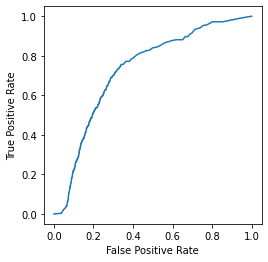

In [16]:
## Model testing
model.eval()

data = model.predict(data, window, variable)

roc_x, roc_y = model.roc(data['UNet'], data['dive'])

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.plot(roc_x, roc_y)
print(-np.trapz(roc_y, roc_x))

## CNNet

In [17]:
model = Lightning.load_from_checkpoint('models/SV_CNNet_15s--epoch=19-val_loss=0.86-train_loss=0.89.ckpt', model=CNNet(len(variable)), weight=30)

0.8689990028424721


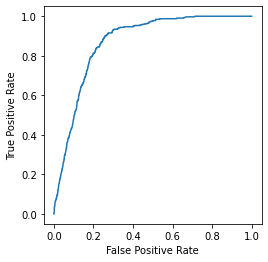

In [18]:
## Model testing
model.eval()
data = model.predict(data, window, variable)

roc_x, roc_y = model.roc(data['CNNet'], data['dive'])

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.plot(roc_x, roc_y)
print(-np.trapz(roc_y, roc_x))

## FCNet

In [19]:
window=21
model = Lightning.load_from_checkpoint('models/SV_FCNet_15s--epoch=3-val_loss=1.16-train_loss=1.35.ckpt', model=FCNet(len(variable),21), weight = 30)

0.6267942531633963


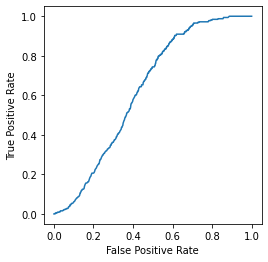

In [20]:
## Model testing
model.eval()
data = model.predict(data, window, variable)

roc_x, roc_y = model.roc(data['FCNet'], data['dive'])

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.plot(roc_x, roc_y)
print(-np.trapz(roc_y, roc_x))

In [21]:
data.to_csv('./results/SD_from_SV.csv', index = False)